In [ ]:
# R Final Project
# 16th December 2019

#Objectives
##1. To perform ANOVA to see the effect of anthocyanin in early blight disease in tomato
##2. To construct histogram of anthocyanin conten

In [3]:
# Install "readxl" packages

install.packages("readxl")

Warning message in install.packages("readxl"):
“installation of package ‘readxl’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
# Load "readxl" packages

library("readxl")

In [5]:
# Get working directory

getwd()

[1] "/Users/NavinShrestha"

In [6]:
# Set working directory

setwd('/Users/NavinShrestha/Desktop/RFinalProject')

In [7]:
# Confirm working directory

getwd()

[1] "/Users/NavinShrestha/Desktop/RFinalProject"

In [12]:
# Import data 

data_lab <- read_excel('anthocyanin.xlsx',skip=1)

In [14]:
# view head of 'anthocyanin' data

head(data_lab)

RAND,Genotype,Anthocyanin content,Group,Rep,Ds score,Run
18FLAV011,Ailsa Craig,NA,P1,NA,3,1
18FLAV035,NC 74CAP(2009),NA,P2,NA,5,1
18FLAV009,NC11142,NA,F1,NA,4,1
18FLAV014,NC16267_BC_003,15.11485,M,1,5,1
18FLAV015,NC16267_BC_012,15.11485,M,1,4,1
18FLAV010,NC16267_BC_015,15.11485,M,1,4,1


In [15]:
# Trim the data - remove the missing data

lab.data.nomissing <- data_lab[!is.na(data_lab[,3]),]

In [16]:
# Remove'no plant' diseae score (Ds score) data

lab.data.nomissing <- lab.data.nomissing[lab.data.nomissing[,6] != 'no plants',]

In [17]:
# Summary of working file (lab.data.nomissing)

summary(lab.data.nomissing)

     RAND             Genotype         Anthocyanin content    Group          
 Length:191         Length:191         Min.   :-4.702      Length:191        
 Class :character   Class :character   1st Qu.: 7.725      Class :character  
 Mode  :character   Mode  :character   Median :15.115      Mode  :character  
                                       Mean   :21.794                        
                                       3rd Qu.:21.713                        
                                       Max.   :84.307                        
      Rep          Ds score              Run       
 Min.   :1.000   Length:191         Min.   :1.000  
 1st Qu.:1.000   Class :character   1st Qu.:1.000  
 Median :2.000   Mode  :character   Median :2.000  
 Mean   :2.005                      Mean   :1.503  
 3rd Qu.:3.000                      3rd Qu.:2.000  
 Max.   :3.000                      Max.   :2.000  

In [18]:
# Attach the working file

attach(lab.data.nomissing)

In [20]:
# Convert disease score (Ds score) into numeric value

lab.data.nomissing$`Ds score` <- as.numeric(lab.data.nomissing$`Ds score`)

In [21]:
# Convert Replication into character value

lab.data.nomissing$Rep <- as.character(lab.data.nomissing$Rep)

In [22]:
# Summary of working file

summary(lab.data.nomissing)

     RAND             Genotype         Anthocyanin content    Group          
 Length:191         Length:191         Min.   :-4.702      Length:191        
 Class :character   Class :character   1st Qu.: 7.725      Class :character  
 Mode  :character   Mode  :character   Median :15.115      Mode  :character  
                                       Mean   :21.794                        
                                       3rd Qu.:21.713                        
                                       Max.   :84.307                        
     Rep               Ds score         Run       
 Length:191         Min.   :2.00   Min.   :1.000  
 Class :character   1st Qu.:4.00   1st Qu.:1.000  
 Mode  :character   Median :5.00   Median :2.000  
                    Mean   :4.89   Mean   :1.503  
                    3rd Qu.:5.00   3rd Qu.:2.000  
                    Max.   :7.00   Max.   :2.000  

In [24]:
# View head of working file

head(lab.data.nomissing)

RAND,Genotype,Anthocyanin content,Group,Rep,Ds score,Run
18FLAV014,NC16267_BC_003,15.114854,M,1,5,1
18FLAV015,NC16267_BC_012,15.114854,M,1,4,1
18FLAV010,NC16267_BC_015,15.114854,M,1,4,1
18FLAV012,NC16267_BC_032,5.038285,L,1,5,1
18FLAV032,NC16267_BC_035,9.404798,L,1,2,1
18FLAV023,NC16267_BC_041,4.366513,L,1,3,1


In [25]:
# Fit a model with ds score as response and group and rep as predictors
model.lab <- lm(`Ds score` ~ Group+Rep, data = lab.data.nomissing)

In [26]:
#view the anove table
anova(model.lab)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Group,2,0.3426057,0.1713029,0.2046246,0.81513638
Rep,2,4.6373585,2.3186793,2.7697078,0.06526722
Residuals,186,155.7111352,0.8371566,NA,NA


In [27]:
# 1 line summary
print(paste("The Group and Rep have no effect on the ds score","after controlling the effect of one-another."))


[1] "The Group and Rep have no effect on the ds score after controlling the effect of one-another."


In [28]:
# Construct histogram for Anthocyanin Content

# Install 'histogram' packages

install.packages("histogram")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [29]:
# Load 'histogram package'

library("histogram")

In [31]:
# Convert 'anthocyanin content' into numeric value

lab.data.nomissing$`Anthocyanin content` <- as.numeric(lab.data.nomissing$`Anthocyanin content`)


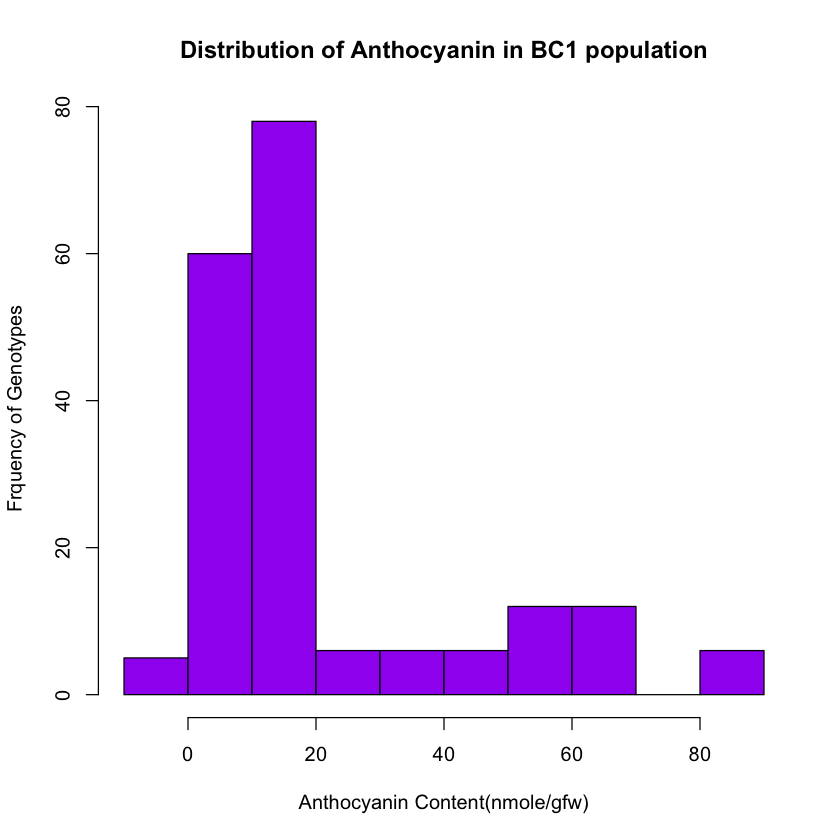

In [32]:
# Construct histogram

hist(lab.data.nomissing$`Anthocyanin content`,breaks=10,main="Distribution of Anthocyanin in BC1 population",ylab="Frquency of Genotypes",xlab="Anthocyanin Content(nmole/gfw)",col="Purple")